In [2]:
import pandas as pd
df = pd.read_excel(r"C:\Users\david\Downloads\Healtcare-Dataset.xlsx")
Health_data = pd.DataFrame(df)

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [123]:
Health_data

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06,4.9,4567,4110.3
...,...,...,...,...,...,...,...,...,...,...,...
7152,29885,2024-03-03,2024-03-07,Typhoid,Private,Blood Test,Jay Sinha,2024-03-10,5.0,2342,2107.8
7153,26517,2024-03-04,2024-03-07,Pneumonia,Private,CT Scan,Jaya Yaadav,2024-03-14,5.0,24943,22448.7
7154,28201,2024-03-05,2024-03-07,Flu,General,Blood Test,Jay Sinha,NaT,3.5,2343,2108.7
7155,24833,2024-03-06,2024-03-07,Typhoid,Private,X-Ray,Mark Joy,2024-03-15,4.9,3475,3127.5


In [4]:
df['Test'].unique()

array(['MRI', 'CT Scan', 'X-Ray', 'Blood Test', 'Ultrasound'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7157 non-null   int64         
 1   Admit_Date               7157 non-null   datetime64[ns]
 2   Discharge_Date           7157 non-null   datetime64[ns]
 3   Diagnosis                7157 non-null   object        
 4   Bed_Occupancy            7157 non-null   object        
 5   Test                     7157 non-null   object        
 6   Doctor                   7157 non-null   object        
 7   Followup Date            7035 non-null   datetime64[ns]
 8   Feedback                 7157 non-null   float64       
 9   Billing Amount           7157 non-null   int64         
 10  Health Insurance Amount  7157 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 615.2+ KB


In [6]:
df.describe()

,Patient_ID,Admit_Date,Discharge_Date,Followup Date,Feedback,Billing Amount,Health Insurance Amount
count,7157.000000,7157,7157,7035,7157.000000,7157.000000,7157.000000
mean,27149.000000,2023-07-24 09:14:42.772111360,2023-08-01 15:14:27.681989376,2023-08-09 09:35:47.718550272,4.723543,26607.891854,23947.102669
min,23571.000000,2022-12-05 00:00:00,2023-01-12 00:00:00,2023-01-15 00:00:00,3.500000,1223.000000,1100.700000
25%,25360.000000,2023-04-03 00:00:00,2023-04-11 00:00:00,2023-04-21 00:00:00,4.500000,5454.000000,4908.600000
50%,27149.000000,2023-07-22 00:00:00,2023-07-31 00:00:00,2023-08-08 00:00:00,5.000000,12348.000000,11113.200000
75%,28938.000000,2023-11-11 00:00:00,2023-11-20 00:00:00,2023-11-26 00:00:00,5.000000,43522.000000,39169.800000
max,30727.000000,2024-03-06 00:00:00,2024-03-07 00:00:00,2024-03-15 00:00:00,5.000000,95867.000000,86280.300000
std,2066.192271,NaN,NaN,NaN,0.479901,25791.931009,23212.737908


In [9]:
df['difference'] = df['Discharge_Date'] - df['Admit_Date'].shift(1)
df['difference']

0          NaT
1      12 days
2       8 days
3       7 days
4       7 days
         ...  
7152    5 days
7153    4 days
7154    3 days
7155    2 days
7156    1 days
Name: difference, Length: 7157, dtype: timedelta64[ns]

In [10]:
df_sorted = df.sort_values(by = 'difference', ascending=False)
df_sorted

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount,difference
1276,25101,2023-03-03,2023-03-15,Pneumonia,General,X-Ray,Jaya Yaadav,2023-03-19,4.0,3658,3292.2,45 days
3008,26682,2023-06-13,2023-06-25,Viral Infection,Private,MRI,Jay Sinha,2023-07-02,5.0,12342,11107.8,45 days
2341,28324,2023-04-12,2023-05-14,Viral Infection,Private,CT Scan,Tejas Saxena,2023-05-18,5.0,45834,41250.6,45 days
4429,24244,2023-08-20,2023-09-21,Flu,Private,Blood Test,Jaya Yaadav,2023-10-30,3.5,6454,5808.6,45 days
4445,25929,2023-09-10,2023-09-22,Malaria,Private,Blood Test,Tejas Saxena,2023-09-30,4.9,12990,11691.0,45 days
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28453,2023-09-19,2023-09-20,Viral Infection,ICU,MRI,Jay Sinha,2023-09-24,5.0,53422,48079.8,1 days
1766,27026,2023-04-08,2023-04-09,Viral Infection,ICU,MRI,Mark Joy,2023-04-13,5.0,43522,39169.8,1 days
4411,30136,2023-09-18,2023-09-19,Typhoid,Private,MRI,Jay Sinha,2023-09-23,5.0,23444,21099.6,1 days
7156,30727,2024-03-06,2024-03-07,Viral Infection,Private,Ultrasound,Jaya Yaadav,2024-03-11,5.0,66537,59883.3,1 days


In [6]:
Health_data['Bed_Occupancy'].unique()

array(['General', 'ICU', 'Private'], dtype=object)

In [18]:
df['Diagnosis'].unique()

array(['Viral Infection ', 'Typhoid', 'Malaria ', 'Flu', 'Pneumonia ',
       'Fracture'], dtype=object)

In [11]:
df['difference']

0          NaT
1      12 days
2       8 days
3       7 days
4       7 days
         ...  
7152    5 days
7153    4 days
7154    3 days
7155    2 days
7156    1 days
Name: difference, Length: 7157, dtype: timedelta64[ns]

In [14]:
import pymysql
mydb = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = 'qwertypraveen06'
)
mydb
mycursor = mydb.cursor()

In [15]:
mycursor

In [16]:
mydb

In [15]:
mycursor.execute('create database Health_care_db')

1

In [16]:
mycursor.execute('use Health_care_db')

0

In [18]:
import pandas as pd
from sqlalchemy import create_engine

connection_string = f'mysql+pymysql://{'root'}:{'qwertypraveen06'}@{'localhost'}/{'Health_care_db'}'
engine = create_engine(connection_string)

Health_data.to_sql('Health_data', con=engine, if_exists = 'replace', index = False)

C:\Users\david\AppData\Local\Temp\ipykernel_33592\529892611.py:7: UserWarning: The provided table name 'Health_data' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  Health_data.to_sql('Health_data', con=engine, if_exists = 'replace', index = False)


7157

PATIENT DEMOGRAPHIC ANALYSIS

--> Analyze the distribution of patients by age, gender, and location

In [ ]:
mycursor.execute('select ')

In [9]:
Health_data.isnull().sum()

Patient_ID                   0
Admit_Date                   0
Discharge_Date               0
Diagnosis                    0
Bed_Occupancy                0
Test                         0
Doctor                       0
Followup Date              122
Feedback                     0
Billing Amount               0
Health Insurance Amount      0
dtype: int64

In [13]:
nat_rows = df[df['Followup Date'].isna()]
nat_rows

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
6549,25639,2024-01-23,2024-01-31,Typhoid,Private,X-Ray,Jaya Yaadav,NaT,5.0,8764,7887.6
6554,27323,2024-01-26,2024-01-31,Flu,ICU,Ultrasound,Tejas Saxena,NaT,5.0,24754,22278.6
6559,30270,2024-01-28,2024-01-31,Fracture,General,CT Scan,Niki Sharma,NaT,5.0,83754,75378.6
6564,28166,2023-12-30,2024-02-01,Typhoid,Private,MRI,Naresh Goyenka,NaT,4.9,53422,48079.8
6569,24798,2024-01-26,2024-02-01,Viral Infection,ICU,Ultrasound,Naresh Goyenka,NaT,3.5,56784,51105.6
...,...,...,...,...,...,...,...,...,...,...,...
7134,25253,2024-03-02,2024-03-06,Viral Infection,General,CT Scan,Jay Sinha,NaT,5.0,38899,35009.1
7139,26516,2024-03-05,2024-03-06,Fracture,Private,MRI,Ravi D,NaT,4.9,8472,7624.8
7144,29043,2024-02-29,2024-03-07,Flu,General,MRI,Jay Sinha,NaT,5.0,43205,38884.5
7149,26938,2024-03-02,2024-03-07,Flu,Private,MRI,Tejas Saxena,NaT,5.0,23443,21098.7


In [21]:
mycursor.execute('use  health_care_db')
mycursor.execute('select * from health_data')


7157

In [25]:
query = mycursor.execute('select * from health_data')
print(query)

7157


In [26]:
def execute_query(query): 
    mycursor.execute(query) 
    result = mycursor.fetchall() 
    column_names = [desc[0] for desc in mycursor.description] 
    df = pd.DataFrame(result, columns=column_names) 
    return df

In [28]:
query = 'select * from health_data'
df = execute_query(query)
print(df)

      Patient_ID Admit_Date Discharge_Date         Diagnosis Bed_Occupancy  \
0          23571 2022-12-31     2023-01-12  Viral Infection        General   
1          27781 2023-01-04     2023-01-12           Typhoid           ICU   
2          24413 2023-01-05     2023-01-12          Malaria        General   
3          27360 2023-01-05     2023-01-12               Flu       Private   
4          26097 2023-01-06     2023-01-12  Viral Infection        General   
...          ...        ...            ...               ...           ...   
7152       29885 2024-03-03     2024-03-07           Typhoid       Private   
7153       26517 2024-03-04     2024-03-07        Pneumonia        Private   
7154       28201 2024-03-05     2024-03-07               Flu       General   
7155       24833 2024-03-06     2024-03-07           Typhoid       Private   
7156       30727 2024-03-06     2024-03-07  Viral Infection        Private   

            Test       Doctor Followup Date  Feedback  Billing 

In [240]:
# --> Trends in Admission Over Time: Analyze monthly patient admissions to identify trends over time.


query = '''
select 
    date_format(admit_date,'%y-%m') as month_year,
    count(Patient_ID) as total_admission
from
    health_data
group by
    date_format(admit_date, '%y-%m')
order by
    month_year;
'''
df = execute_query(query)
df

,month_year,total_admission
0,22-12,61
1,23-01,590
2,23-02,497
3,23-03,609
4,23-04,493
5,23-05,509
6,23-06,466
7,23-07,505
8,23-08,513
9,23-09,458


<Figure size 1200x600 with 0 Axes>

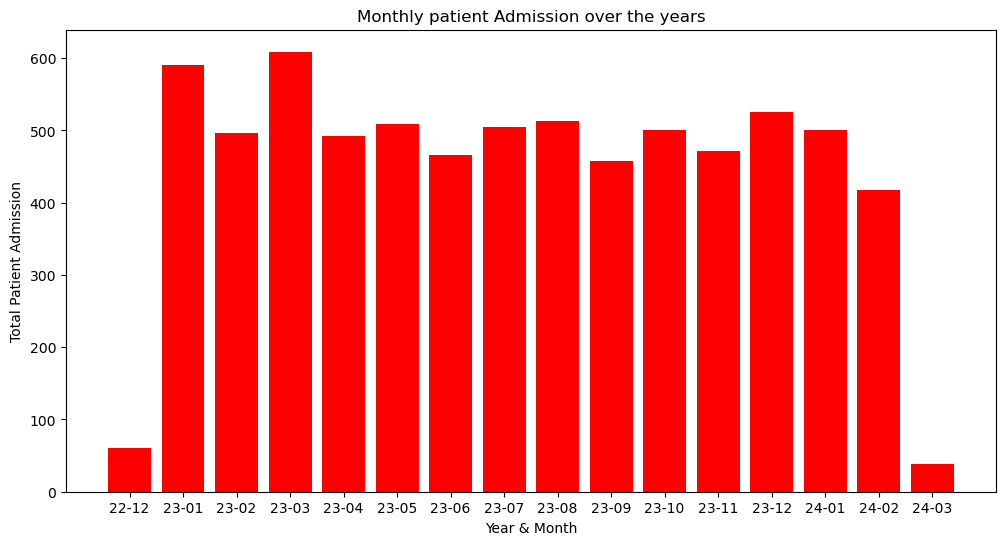

In [175]:
# plotting bar chart
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.bar(df['month_year'],df['total_admission'],color = 'red')
plt.xlabel('Year & Month')
plt.ylabel('Total Patient Admission')
plt.title('Monthly patient Admission over the years')
plt.show()

In [72]:
# --> Diagnosis Frequency Analysis: Identify the top 5 most common diagnoses.

query = '''
SELECT 
    diagnosis, 
COUNT(*) AS diagnosis_count 
FROM 
    health_data 
GROUP BY 
    diagnosis 
ORDER BY 
    diagnosis_count DESC 
LIMIT 5;
'''

df = execute_query(query)
print(df)

          diagnosis  diagnosis_count
0  Viral Infection              2004
1               Flu             1717
2          Malaria              1431
3           Typhoid             1145
4        Pneumonia               573


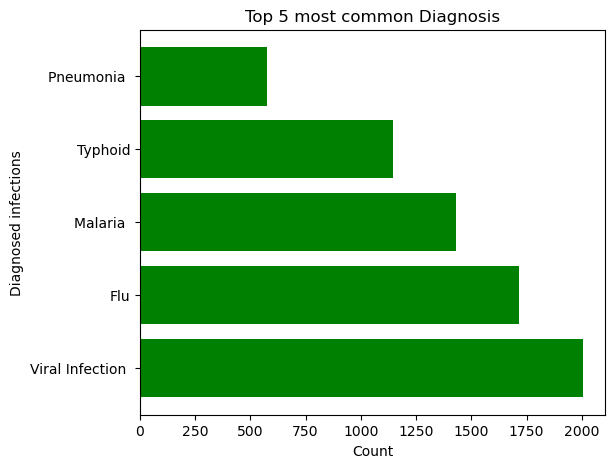

In [76]:
# horizontal bar plot

%matplotlib inline

plt.figure(figsize = (6,5))
plt.barh(df['diagnosis'],df['diagnosis_count'],color = 'green')
plt.xlabel('Count')
plt.ylabel('Diagnosed infections')
plt.title('Top 5 most common Diagnosis')
plt.show()

In [51]:
#--> Bed Occupancy Analysis: Analyze the distribution of bed occupancy types.


query = '''
select 
    bed_occupancy,
    COUNT(*) AS distribution_count
from
    health_data
group by
    bed_occupancy
order by
    distribution_count DESC;
'''

df = execute_query(query)
print(df)

  bed_occupancy  distribution_count
0       Private                3579
1       General                2385
2           ICU                1193


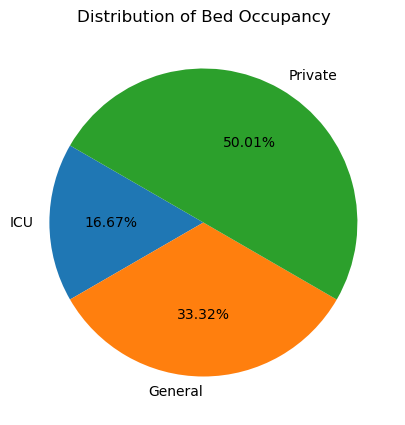

In [54]:
data = {
    'ICU': 1193,
    'General': 2385,
    'Private': 3579
}

beds = list(data.keys())
count = list(data.values())

%matplotlib inline

plt.figure(figsize = (6,5))
plt.pie(count, labels = beds, autopct = '%.2f%%',startangle = 150)
plt.title('Distribution of Bed Occupancy')
plt.show()

In [58]:
# Length of Stay Distribution: Analyze the average and maximum length of stay for patients.

query = '''
select
    AVG(DATEDIFF(discharge_date, admit_date)) AS avg_stay_length,
    MAX(DATEDIFF(discharge_date, admit_date)) AS max_stay_length
from
    health_data;
'''

df = execute_query(query)
df

,avg_stay_length,max_stay_length
0,8.2498,45


     admit_date discharge_date  stay_length
0    2022-12-05     2023-01-19           45
1    2022-12-06     2023-01-20           45
2    2022-12-07     2023-01-21           45
3    2022-12-08     2023-01-22           45
4    2022-12-09     2023-01-23           45
...         ...            ...          ...
7152 2024-03-04     2024-03-05            1
7153 2024-03-05     2024-03-06            1
7154 2024-03-05     2024-03-06            1
7155 2024-03-06     2024-03-07            1
7156 2024-03-06     2024-03-07            1

[7157 rows x 3 columns]


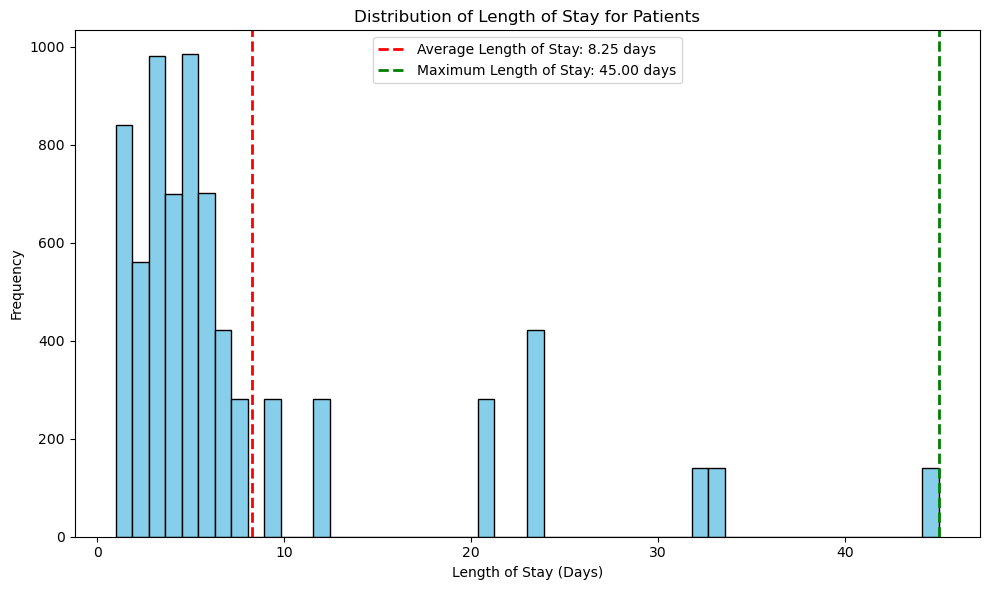

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

length_of_stay = '''
select
    admit_date,
    discharge_date,
    DATEDIFF(discharge_date, admit_date) AS stay_length
from
    health_data
order by 
    stay_length DESC
'''

df_stay = execute_query(length_of_stay)
print(df_stay)

avg_length_of_stay = df_stay['stay_length'].mean()
max_length_of_stay = df_stay['stay_length'].max()

# hist plotting

%matplotlib inline

plt.figure(figsize=(10, 6)) 
plt.hist(df_stay['stay_length'], bins=50, color='skyblue', edgecolor='black') 
plt.axvline(avg_length_of_stay, color='red', linestyle='dashed', linewidth=2, label=f'Average Length of Stay: {avg_length_of_stay:.2f} days') 
plt.axvline(max_length_of_stay, color='green', linestyle='dashed', linewidth=2, label=f'Maximum Length of Stay: {max_length_of_stay:.2f} days') 
plt.xlabel('Length of Stay (Days)') 
plt.ylabel('Frequency') 
plt.title('Distribution of Length of Stay for Patients') 
plt.legend() 
plt.tight_layout() 
plt.show()

In [83]:
# Seasonal Admission Patterns: Identify the seasonality in admissions based on the month.

query = '''
select 
    MONTH(admit_date) AS Monthly_admission,
    COUNT(*) AS admission_count
from 
    health_data
group by
    Monthly_admission
order by
    Monthly_admission;
'''

df = execute_query(query)
df

,Monthly_admission,admission_count
0,1,1091
1,2,914
2,3,648
3,4,493
4,5,509
5,6,466
6,7,505
7,8,513
8,9,458
9,10,501


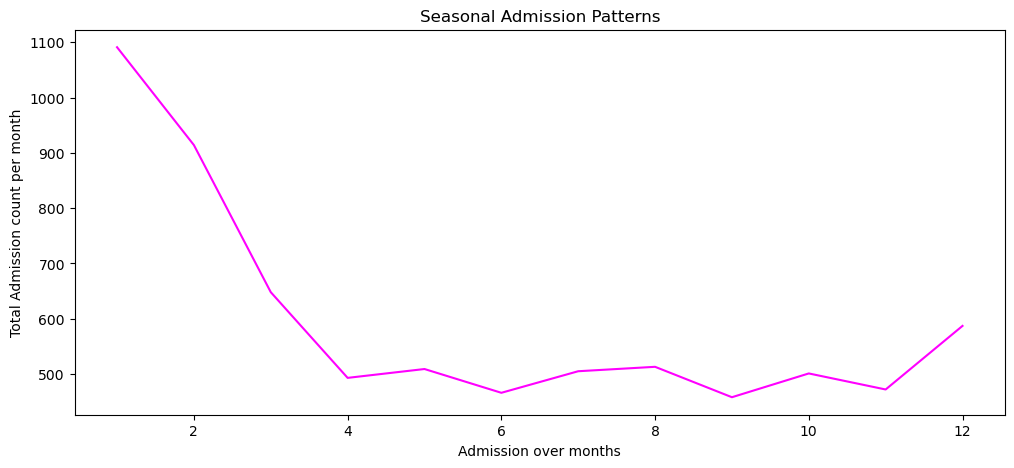

In [88]:
# Line plot for Seasonal Admission Patterns

%matplotlib inline

plt.figure(figsize = (12,5))
plt.plot(df['Monthly_admission'],df['admission_count'],color = 'magenta')
plt.xlabel('Admission over months')
plt.ylabel('Total Admission count per month')
plt.title('Seasonal Admission Patterns')
plt.show()

In [246]:
# --> Doctors Average feedback 

query = '''
select
    Doctor,
    COUNT(*) AS patients_treated,
    ROUND(AVG(feedback), 2) AS Average_feedback
from
    Health_data
group by
    doctor
order by
    patients_treated;
'''

df = execute_query(query)
df

,Doctor,patients_treated,Average_feedback
0,Naresh Goyenka,1022,4.72
1,Tejas Saxena,1022,4.72
2,Ravi D,1022,4.72
3,Niki Sharma,1022,4.72
4,Jay Sinha,1023,4.72
5,Jaya Yaadav,1023,4.72
6,Mark Joy,1023,4.72


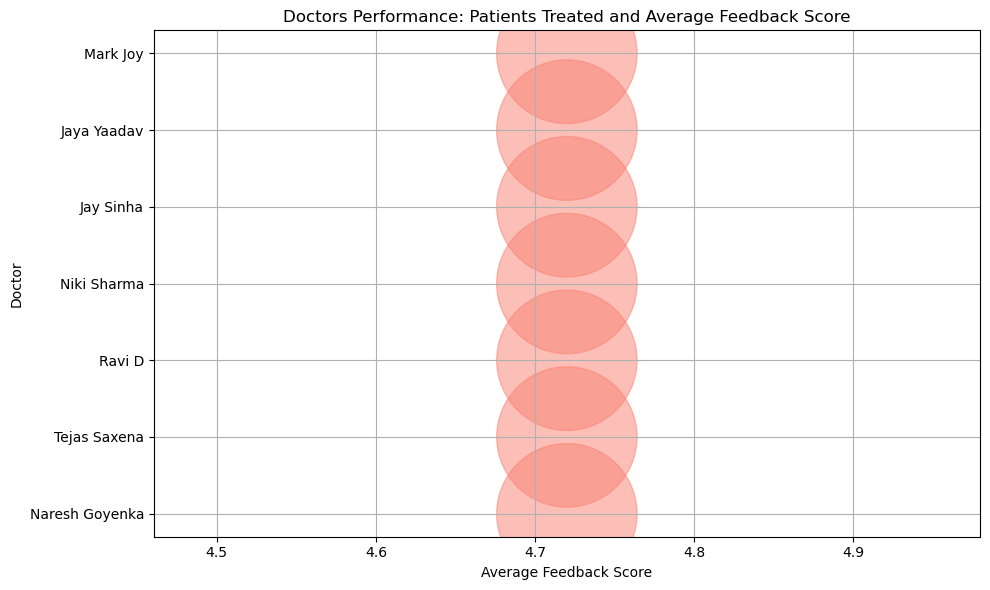

In [252]:
# Bubble plot

%matplotlib inline

plt.figure(figsize=(10, 6))
bubble_sizes = df['patients_treated'] * 10  # Scale bubble size for better visualization
plt.scatter(df['Average_feedback'], df['Doctor'], s=bubble_sizes, alpha=0.5, color='salmon')
plt.xlabel('Average Feedback Score')
plt.ylabel('Doctor')
plt.title('Doctors Performance: Patients Treated and Average Feedback Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
# --> the frequency and popularity of treatments or procedures

query = '''
select
    diagnosis,
    COUNT(*) AS treatment_count
from 
    health_data
group by
    diagnosis
order by
    treatment_count DESC;
'''

df = execute_query(query)
df

,diagnosis,treatment_count
0,Viral Infection,2004
1,Flu,1717
2,Malaria,1431
3,Typhoid,1145
4,Pneumonia,573
5,Fracture,287


In [104]:
pip install squarify

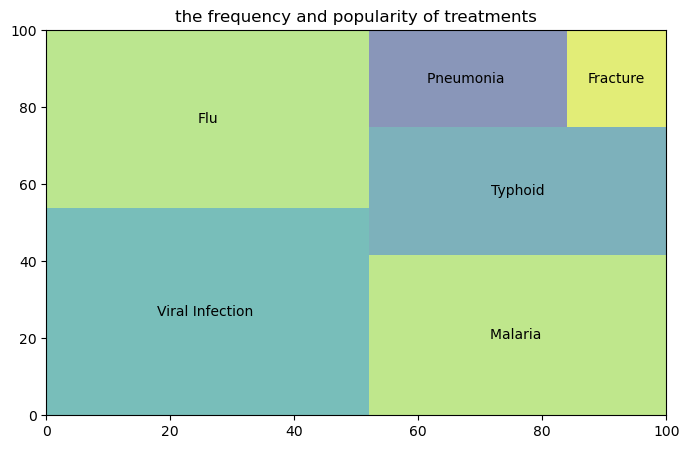

In [110]:
# Tree Map plot

%matplotlib inline
import squarify

plt.figure(figsize = (8,5))
squarify.plot(sizes = df['treatment_count'], label = df['diagnosis'], alpha = .6)
plt.title('the frequency and popularity of treatments')
plt.axis('on')
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_33592\3304151382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'diagnosis',y = 'treatment_count',kind = 'bar', data = df, palette = 'pastel',legend = False)


<Figure size 1400x500 with 0 Axes>

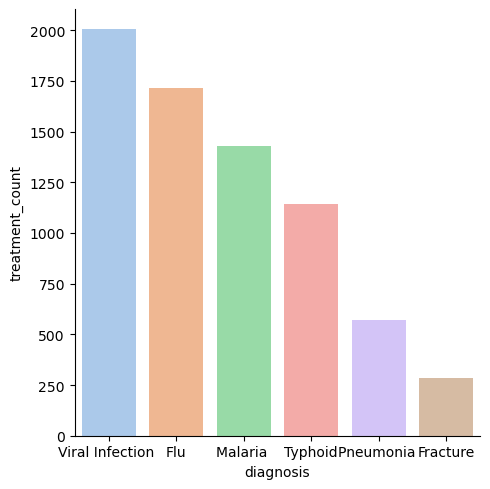

In [115]:
# Cat plot
%matplotlib inline
plt.figure(figsize = (14,5))
sns.catplot(x = 'diagnosis',y = 'treatment_count',kind = 'bar', data = df, palette = 'pastel',legend = False)
plt.show()

In [134]:
# to see which infection type has the highest diagnosis count in each month

query = '''
with monthlyinfectioncount AS (
    select 
        MONTH(admit_date) AS Admission_month,
        diagnosis,
        COUNT(*) AS diagnosis_count,
        ROW_NUMBER() OVER (PARTITION BY MONTH(admit_date) ORDER BY COUNT(*) DESC) AS rn
    from
        health_data
    where
        diagnosis IN ('Viral infection','flu','Malaria','Typhoid','Pneumonia','Fracturw')
    group by
        MONTH(admit_date), diagnosis
)
SELECT
    Admission_month,
    diagnosis,
    diagnosis_count
from
    monthlyinfectioncount
where
    rn = 1
order by
    Admission_month;
'''

df = execute_query(query)
df

,Admission_month,diagnosis,diagnosis_count
0,1,Flu,263
1,2,Flu,222
2,3,Flu,152
3,4,Flu,119
4,5,Flu,121
5,6,Flu,113
6,7,Flu,121
7,8,Flu,125
8,9,Flu,108
9,10,Flu,120


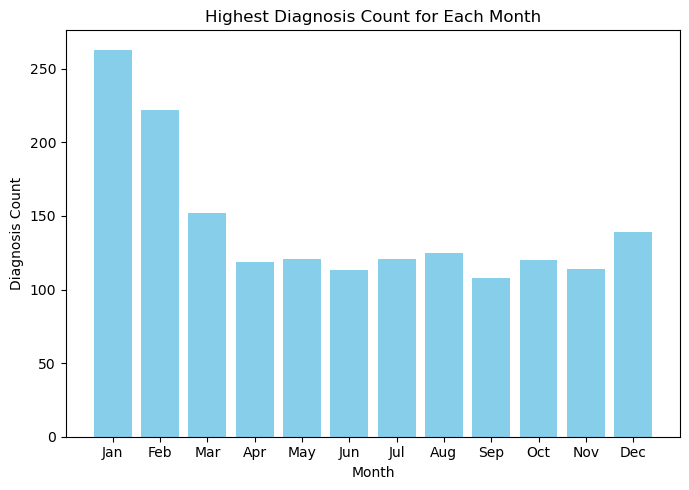

In [137]:
# bar plot

%matplotlib inline

plt.figure(figsize = (7,5))
plt.bar(df['Admission_month'],df['diagnosis_count'],color = 'skyblue', tick_label = df['diagnosis'])
plt.xlabel('Month')
plt.ylabel('Diagnosis Count')
plt.title('Highest Diagnosis Count for Each Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [144]:
# Insights on Utilization of various test facility

query = '''
select
    test,
    COUNT(*) AS test_count
from
    health_data
group by
    test
order by
    test_count DESC;
'''

df = execute_query(query)
df

,test,test_count
0,Blood Test,2236
1,MRI,1789
2,CT Scan,1342
3,X-Ray,895
4,Ultrasound,895


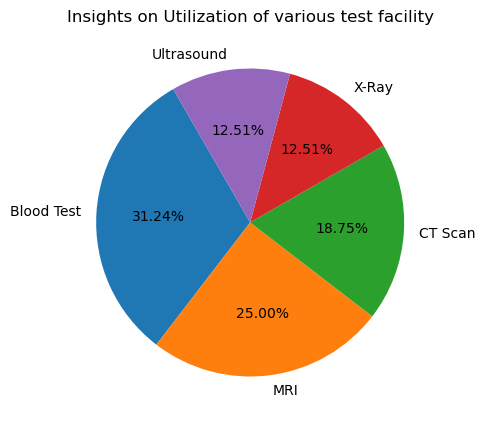

In [156]:
# pie chart

%matplotlib inline
data = {
    'Blood Test' : 2236,
    'MRI':	1789,
    'CT Scan':	1342,
    'X-Ray':	895,
    'Ultrasound':	895
}

test = list(data.keys())
count = list(data.values())


plt.figure(figsize = (7,5))
plt.pie(count,labels = test, autopct = '%.2f%%', startangle = 120)
plt.title('Insights on Utilization of various test facility')
plt.show()

In [161]:
# Monitor facility usage to prevent overcrowding and ensure efficient operations over months.

query = '''
select
    MONTH(admit_date) AS admission_month,
    COUNT(*) AS test_count
from
    health_data
group by
    MONTH(admit_date)
order by
    admission_month;
'''

df = execute_query(query)
df

,admission_month,test_count
0,1,1091
1,2,914
2,3,648
3,4,493
4,5,509
5,6,466
6,7,505
7,8,513
8,9,458
9,10,501


<Figure size 500x200 with 0 Axes>

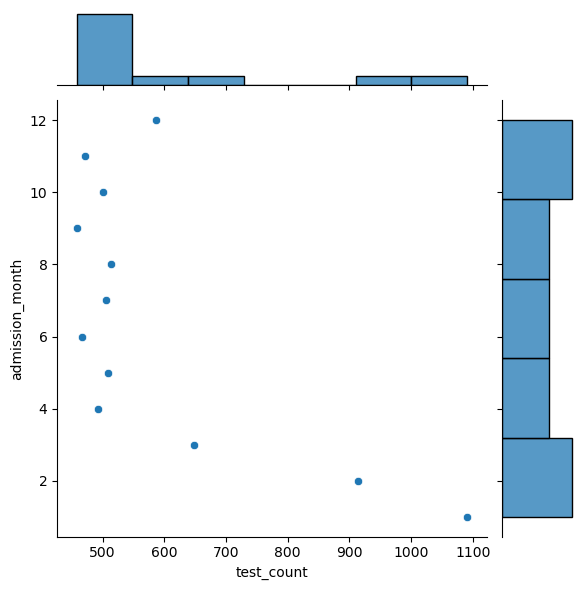

In [172]:
# joint plot


plt.figure(figsize = (5,2))
sns.jointplot(x = 'test_count',y = 'admission_month', data = df)
plt.show()

In [233]:
# Test Frequency and Cost Analysis

query = '''
SELECT
    DATE_FORMAT(discharge_date, '%Y-%M') AS billing_month,
    test,
    SUM(`Billing Amount`) AS total_test_cost
FROM
    health_data
GROUP BY
    billing_month, test
ORDER BY
    billing_month, test;
'''

df = execute_query(query)
df

,billing_month,test,total_test_cost
0,2023-April,Blood Test,822465
1,2023-April,CT Scan,4414265
2,2023-April,MRI,3871997
3,2023-April,Ultrasound,3812227
4,2023-April,X-Ray,367550
...,...,...,...
70,2024-March,Blood Test,168429
71,2024-March,CT Scan,962129
72,2024-March,MRI,841507
73,2024-March,Ultrasound,992603


test
Blood Test    object
CT Scan       object
MRI           object
Ultrasound    object
X-Ray         object
dtype: object


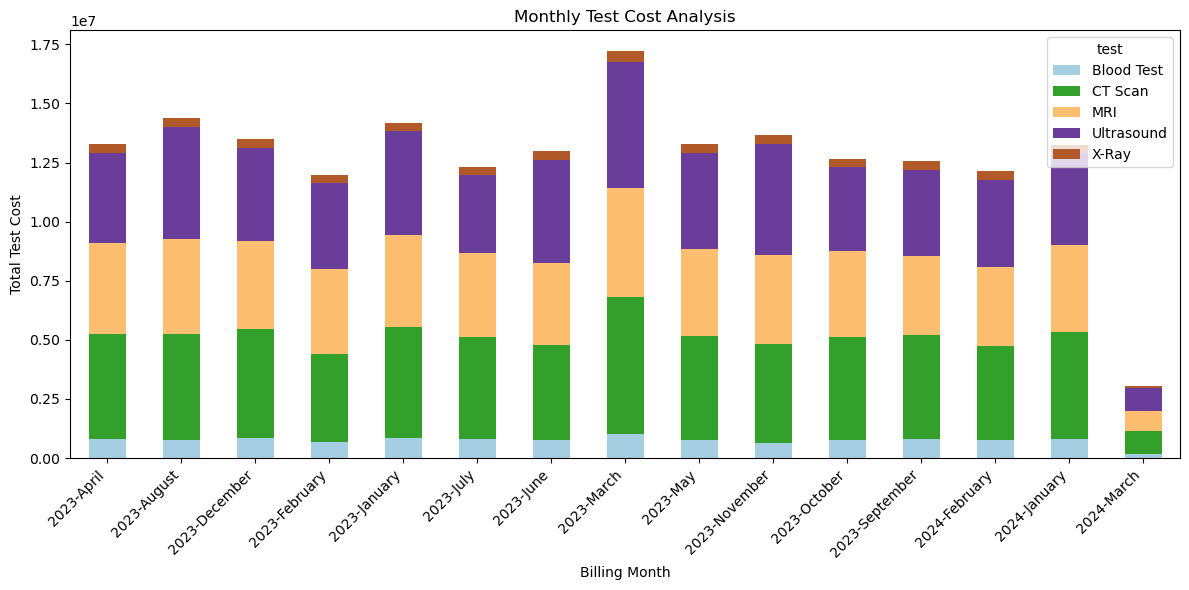

In [239]:
# Stacked Bar Chart

%matplotlib inline

df_pivot = df.pivot(index = 'billing_month',columns = 'test',values = 'total_test_cost').fillna(0)
print(df_pivot.dtypes)
df_pivot = df_pivot.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plotting the stacked bar chart using matplotlib
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.xlabel('Billing Month')
plt.ylabel('Total Test Cost')
plt.title('Monthly Test Cost Analysis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [225]:
# Analyze billing amounts and health insurance coverage to identify financial trends and patient payment patterns.

query = '''
SELECT
    DATE_FORMAT(discharge_date, '%Y-%m') AS billing_month,
    SUM(`Billing Amount`) AS total_billing_amount,
    SUM(`Health Insurance Amount`) AS total_insurance_amount,
    SUM(`Billing Amount`) - SUM(`Health Insurance Amount`) AS out_of_pocket_amount
FROM
    health_data
GROUP BY
    billing_month
ORDER BY
    billing_month;
'''

df = execute_query(query)
df

,billing_month,total_billing_amount,total_insurance_amount,out_of_pocket_amount
0,2023-01,14188836,12769952.4,1418883.6
1,2023-02,11982241,10784016.9,1198224.1
2,2023-03,17229571,15506613.9,1722957.1
3,2023-04,13288504,11959653.6,1328850.4
4,2023-05,13274695,11947225.5,1327469.5
5,2023-06,13003743,11703368.7,1300374.3
6,2023-07,12301475,11071327.5,1230147.5
7,2023-08,14361519,12925367.1,1436151.9
8,2023-09,12558934,11303040.6,1255893.4
9,2023-10,12651701,11386530.9,1265170.1


<Figure size 1200x600 with 0 Axes>

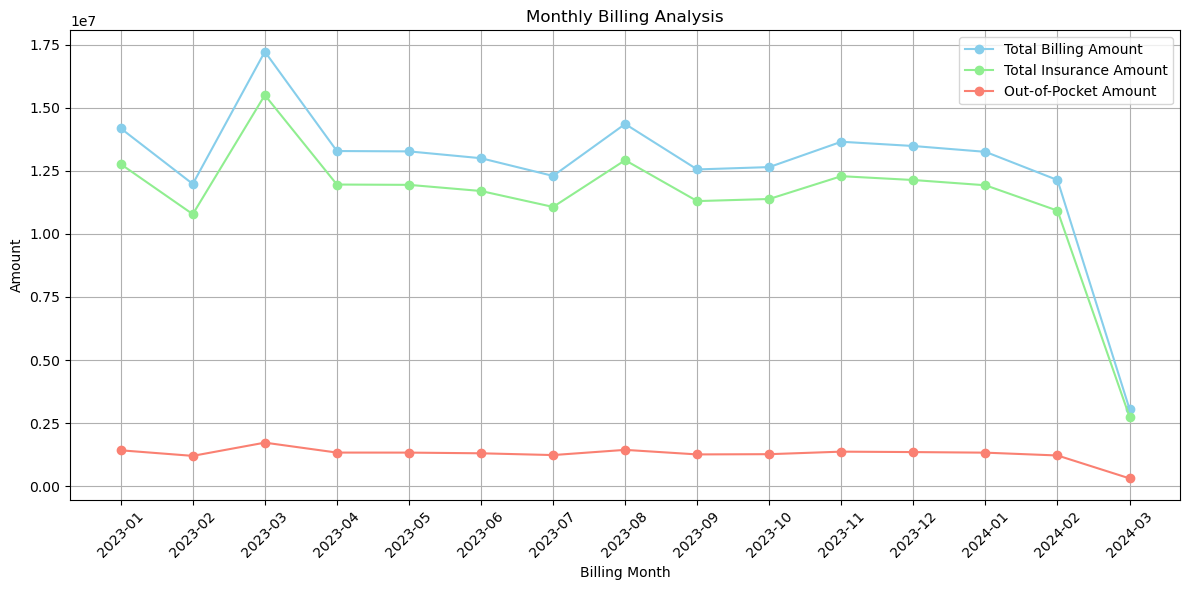

In [227]:
# Line plot

%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(df['billing_month'], df['total_billing_amount'], marker='o', linestyle='-', color='skyblue', label='Total Billing Amount')
plt.plot(df['billing_month'], df['total_insurance_amount'], marker='o', linestyle='-', color='lightgreen', label='Total Insurance Amount')
plt.plot(df['billing_month'], df['out_of_pocket_amount'], marker='o', linestyle='-', color='salmon', label='Out-of-Pocket Amount')
plt.xlabel('Billing Month')
plt.ylabel('Amount')
plt.title('Monthly Billing Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [197]:
b = '''
describe health_data;
'''

df = execute_query(b)
df

,Field,Type,Null,Key,Default,Extra
0,Patient_ID,bigint,YES,,None,
1,Admit_Date,datetime,YES,,None,
2,Discharge_Date,datetime,YES,,None,
3,Diagnosis,text,YES,,None,
4,Bed_Occupancy,text,YES,,None,
5,Test,text,YES,,None,
6,Doctor,text,YES,,None,
7,Followup Date,datetime,YES,,None,
8,Feedback,double,YES,,None,
9,Billing Amount,bigint,YES,,None,


In [255]:
# Patient Demographics and Treatment Outcomes:

query = '''
SELECT
    diagnosis,
    COUNT(*) AS diagnosis_count,
    ROUND(AVG(feedback), 2) AS avg_feedback,
    AVG(`Billing Amount`) AS avg_billing_amount
FROM
    health_data
GROUP BY
    diagnosis
ORDER BY
    diagnosis_count DESC;
'''

df = execute_query(query)
df

,diagnosis,diagnosis_count,avg_feedback,avg_billing_amount
0,Viral Infection,2004,4.73,26654.8268
1,Flu,1717,4.72,26719.5807
2,Malaria,1431,4.72,26559.0783
3,Typhoid,1145,4.73,26508.9397
4,Pneumonia,573,4.72,26555.2513
5,Fracture,287,4.73,26355.2369


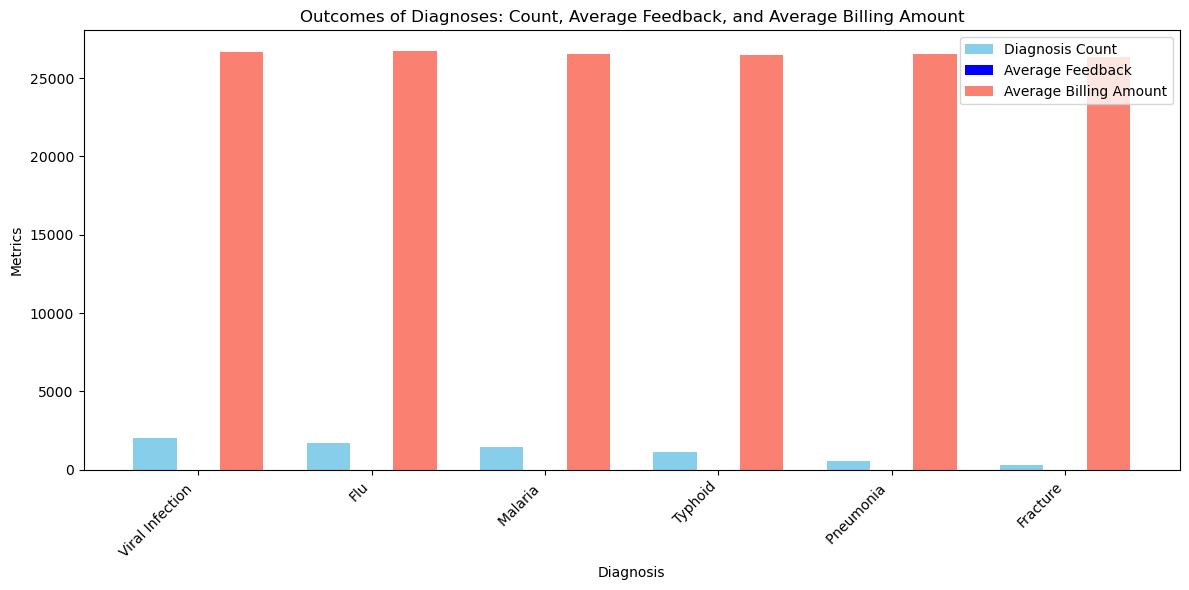

In [265]:
# grouped bar plot
import numpy as np
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.25
bar_positions = np.arange(len(df['diagnosis']))

bar1 = ax1.bar(bar_positions - bar_width, df['diagnosis_count'], bar_width, label='Diagnosis Count', color='skyblue')
bar2 = ax1.bar(bar_positions, df['avg_feedback'], bar_width, label='Average Feedback', color='blue')
bar3 = ax1.bar(bar_positions + bar_width, df['avg_billing_amount'], bar_width, label='Average Billing Amount', color='salmon')

ax1.set_xlabel('Diagnosis')
ax1.set_ylabel('Metrics')
ax1.set_title('Outcomes of Diagnoses: Count, Average Feedback, and Average Billing Amount')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df['diagnosis'], rotation=45, ha='right')
ax1.legend()

fig.tight_layout()
plt.show()

In [268]:
query = '''
SELECT
    MONTH(admit_date) AS Admission_month,
    diagnosis,
    COUNT(*) AS diagnosis_count
FROM
    health_data
WHERE
    diagnosis IN ('Viral infection','flu','Malaria','Typhoid','Pneumonia','Fracture')
GROUP BY
    MONTH(admit_date), diagnosis
ORDER BY
    Admission_month, diagnosis_count DESC;
'''

df = execute_query(query)
df

,Admission_month,diagnosis,diagnosis_count
0,1,Flu,263
1,1,Typhoid,175
2,1,Fracture,43
3,2,Flu,222
4,2,Typhoid,144
5,2,Fracture,37
6,3,Flu,152
7,3,Typhoid,106
8,3,Fracture,27
9,4,Flu,119


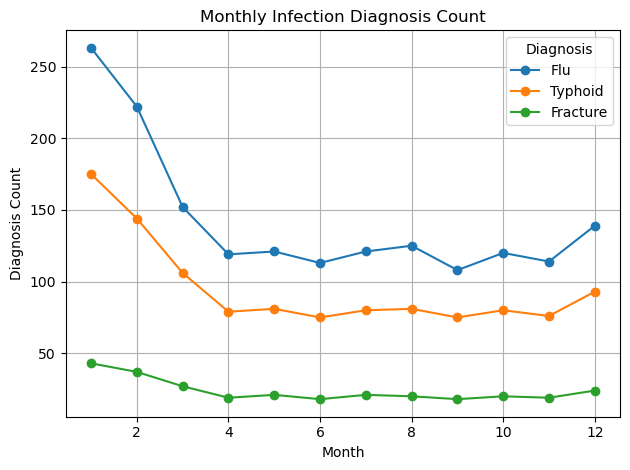

In [275]:
for diagnosis in df['diagnosis'].unique():
    diagnosis_data = df[df['diagnosis'] == diagnosis]
    plt.plot(diagnosis_data['Admission_month'], diagnosis_data['diagnosis_count'], marker='o', label=diagnosis)


plt.xlabel('Month')
plt.ylabel('Diagnosis Count')
plt.title('Monthly Infection Diagnosis Count')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [276]:
query = '''
select
    MONTH(admit_date) AS admission_month,
    COUNT(*) AS test_count
from
    health_data
group by
    MONTH(admit_date)
order by
    admission_month;
'''

df = execute_query(query)
df

,admission_month,test_count
0,1,1091
1,2,914
2,3,648
3,4,493
4,5,509
5,6,466
6,7,505
7,8,513
8,9,458
9,10,501


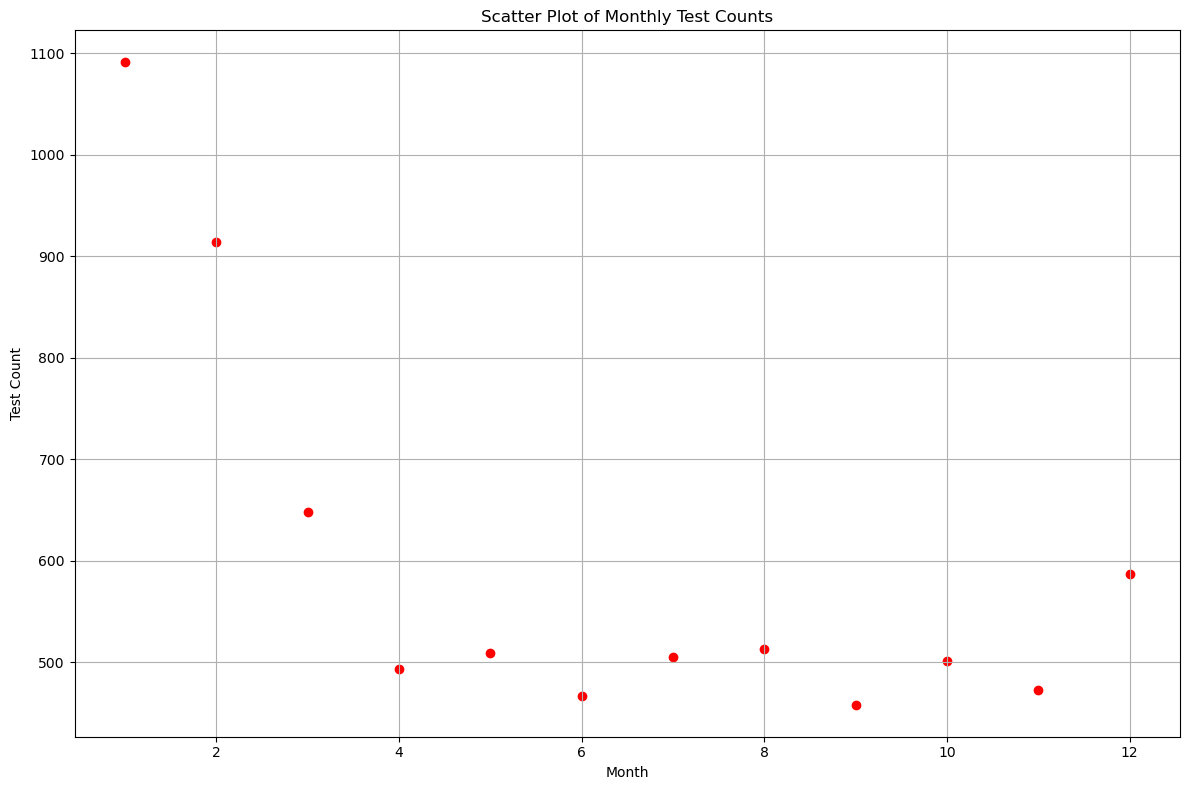

In [282]:
plt.figure(figsize=(12, 8))
plt.scatter(df['admission_month'], df['test_count'], color='red', marker='o')
plt.xlabel('Month')
plt.ylabel('Test Count')
plt.title('Scatter Plot of Monthly Test Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

In [283]:
query = '''
SELECT
    diagnosis,
    COUNT(*) AS diagnosis_count,
    ROUND(AVG(feedback), 2) AS avg_feedback,
    AVG(`Billing Amount`) AS avg_billing_amount
FROM
    health_data
GROUP BY
    diagnosis
ORDER BY
    diagnosis_count DESC;
'''

df = execute_query(query)
df

,diagnosis,diagnosis_count,avg_feedback,avg_billing_amount
0,Viral Infection,2004,4.73,26654.8268
1,Flu,1717,4.72,26719.5807
2,Malaria,1431,4.72,26559.0783
3,Typhoid,1145,4.73,26508.9397
4,Pneumonia,573,4.72,26555.2513
5,Fracture,287,4.73,26355.2369


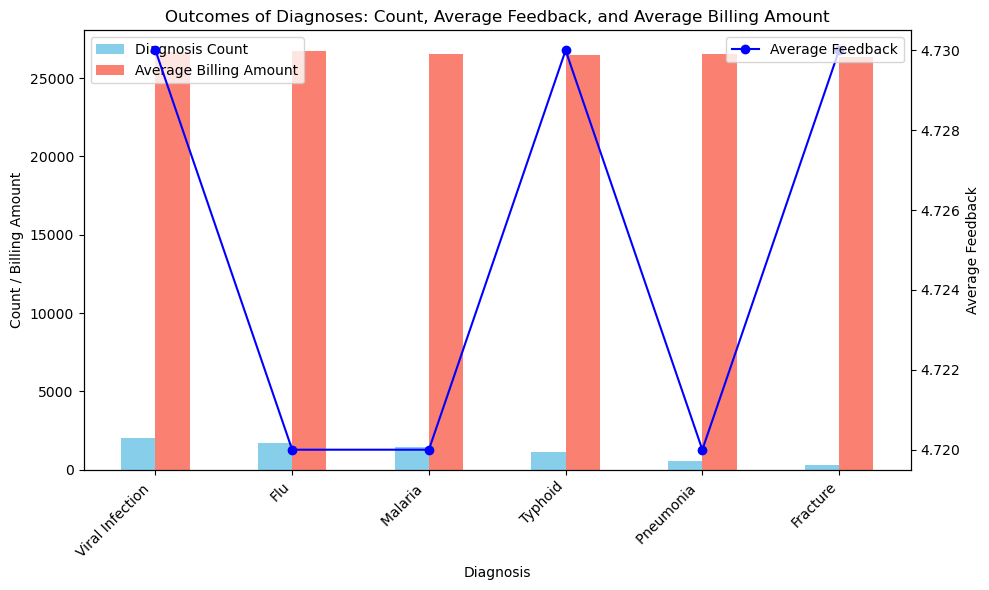

In [287]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.25
bar_positions = np.arange(len(df11['diagnosis']))

# Plot diagnosis count and average billing amount on the primary y-axis
bar1 = ax1.bar(bar_positions - bar_width/2, df11['diagnosis_count'], bar_width, label='Diagnosis Count', color='skyblue')
bar3 = ax1.bar(bar_positions + bar_width/2, df11['avg_billing_amount'], bar_width, label='Average Billing Amount', color='salmon')

# Set the primary y-axis labels
ax1.set_xlabel('Diagnosis')
ax1.set_ylabel('Count / Billing Amount')
ax1.set_title('Outcomes of Diagnoses: Count, Average Feedback, and Average Billing Amount')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df['diagnosis'], rotation=45, ha='right')
ax1.legend(loc='upper left')

# Create a secondary y-axis for average feedback
ax2 = ax1.twinx()
bar2 = ax2.plot(bar_positions, df11['avg_feedback'], marker='o', linestyle='-', color='blue', label='Average Feedback')

# Set the secondary y-axis label
ax2.set_ylabel('Average Feedback')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()